# Predicción de Diabetes con Regresión Logística

En este trabajo se utiliza un modelo de **Regresión Logística** para predecir si una persona tiene diabetes o no, a partir de variables clínicas como nivel de glucosa, presión arterial, índice de masa corporal (IMC), entre otros.

Se trata de un problema de **clasificación binaria**, donde:
- **1** representa que la persona tiene diabetes.
- **0** representa que no la tiene.

El dataset utilizado es el **Pima Indians Diabetes Database**(`https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data`)

## Importar todas las librerias que necesitamos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Libraries imported successfully.


## Cargar el dataset

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descripción general del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Verificar que no haya valores nulos en los datos

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Gráfico - Correlación entre variables

El siguiente gráfico muestra la **matriz de correlación** entre las variables del dataset.

Este tipo de gráfico permite visualizar qué tan relacionadas están entre sí las variables numéricas. Los valores van de **-1 (correlación negativa perfecta)** a **+1 (correlación positiva perfecta)**. Un valor cercano a 0 indica **poca o nula relación** entre las variables.

En particular, observamos que la variable **`Glucose` (0.47)** tiene la correlación más fuerte con `Outcome`, lo que indica que **a mayor nivel de glucosa en sangre, mayor probabilidad de que una persona tenga diabetes**.

Otras variables con correlaciones positivas importantes son:
- `BMI` (Índice de Masa Corporal): 0.29
- `Age`: 0.24
- `Pregnancies`: 0.22

Esto nos sugiere que estas variables pueden ser **factores relevantes para el diagnóstico** de diabetes, y pueden influir en el desempeño del modelo.

En cambio, variables como `BloodPressure`, `SkinThickness` e `Insulin` muestran una correlación muy baja o casi nula con el diagnóstico de diabetes, lo cual podría implicar menor impacto en la predicción.


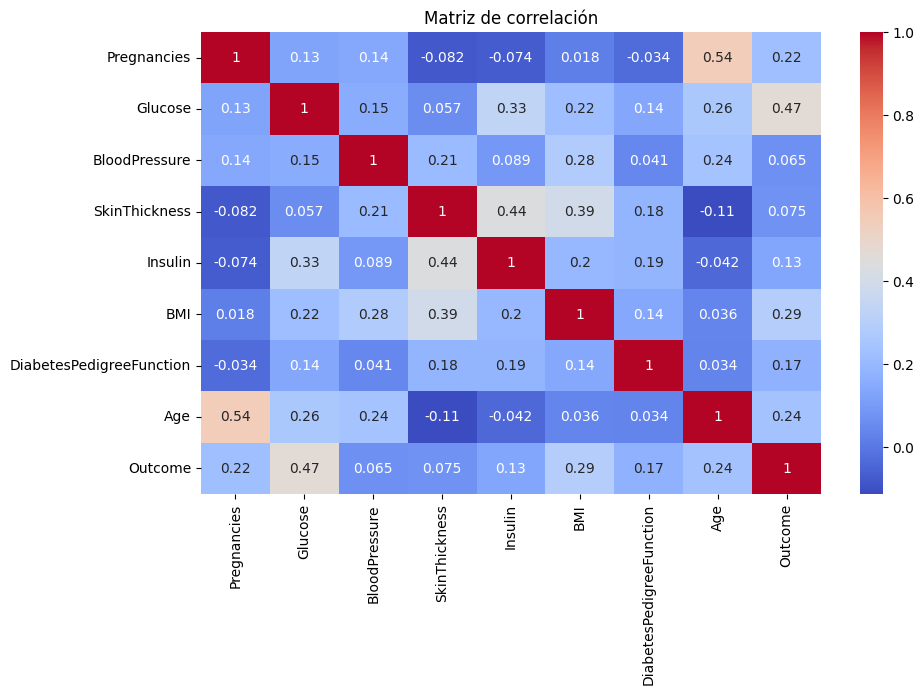

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

## División de los datos en entrenamiento y prueba

Antes de entrenar el modelo, es importante dividir el dataset en dos partes:

- **Conjunto de entrenamiento (`train`)**: se usa para que el modelo aprenda.
- **Conjunto de prueba (`test`)**: se usa para evaluar qué tan bien funciona con datos que nunca vio.

En este caso, utilizamos la función `train_test_split` de Scikit-Learn, que divide los datos en 80% para entrenamiento y 20% para prueba.

### Detalle de cada variable:

- `X`: contiene todas las variables independientes (glucosa, edad, BMI, etc.), excepto la variable objetivo.
- `y`: contiene la columna `Outcome`, que es el valor que queremos predecir (0 = no diabetes, 1 = sí diabetes).
- `X_train`, `y_train`: se usan para entrenar el modelo.
- `X_test`, `y_test`: se usan para hacer predicciones y comparar con los valores reales.

El parámetro `random_state=42` se usa para que la división sea reproducible (si ejecutamos el código varias veces, siempre obtendremos la misma separación).


In [8]:
X = df.drop("Outcome", axis=1)  # Variables independientes
y = df["Outcome"]  # Variable objetivo (0 = no diabetes, 1 = sí diabetes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo de Regresión Logística

Se crea y entrena un modelo de **Regresión Logística** usando Scikit-Learn.

- utiliza `max_iter=1000` para asegurar que el algoritmo tenga suficiente número de iteraciones para converger (ajustarse bien a los datos).
- `.fit(X_train, y_train)` entrena el modelo con los datos de entrenamiento.


In [9]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Realizar predicciones con el conjunto de prueba

Una vez entrenado el modelo, utilizamos el método `.predict()` para que realice predicciones sobre el conjunto de prueba (`X_test`), que contiene datos que el modelo nunca vio antes.

El resultado (`y_pred`) es un arreglo con las clases predichas: **0 (no diabetes)** o **1 (diabetes)**.


In [13]:
y_pred = modelo.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

## Visualización de resultados


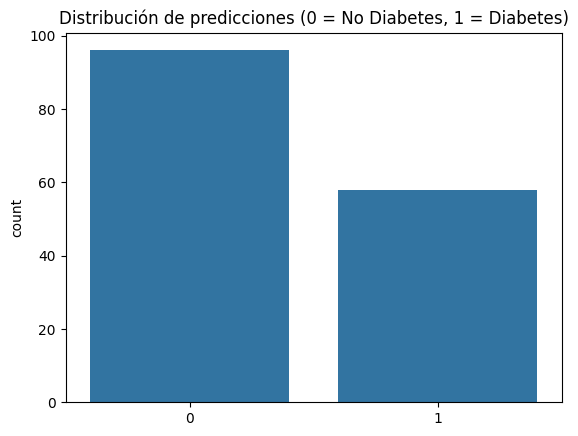

In [17]:
sns.countplot(x=y_pred)
plt.title("Distribución de predicciones (0 = No Diabetes, 1 = Diabetes)")
plt.show()

## Evaluar el rendimiento del modelo
Para medir qué tan bien funciona el modelo, comparamos las predicciones (`y_pred`) con los valores reales (`y_test`).

- **Matriz de confusión**: muestra los aciertos y errores separados por clase.
- **Reporte de clasificación**: incluye métricas importantes como `precision`, `recall` y `f1-score` para cada clase.
- **Accuracy**: porcentaje total de predicciones correctas.

En este caso, el modelo logró una precisión del **74,67%**, con mejor desempeño para la clase 0 (no diabetes) que para la clase 1 (diabetes), algo común cuando hay clases desbalanceadas.


In [11]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[78 21]
 [18 37]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Precisión del modelo: 0.7467532467532467


## Visualización de la matriz de confusión

Este gráfico muestra la matriz de confusión de forma visual. Cada celda indica la cantidad de casos predichos correctamente (diagonal) o incorrectamente (fuera de la diagonal), según la clase real y la clase predicha.

- **Azul más oscuro = mayor cantidad de ejemplos**
- **Diagonal = aciertos**
- **Fuera de la diagonal = errores**


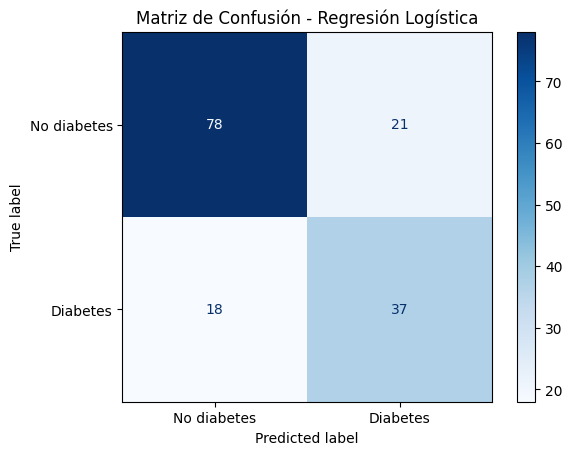

In [16]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["No diabetes", "Diabetes"],
    cmap="Blues"
)

plt.title("Matriz de Confusión - Regresión Logística")
plt.grid(False)
plt.show()

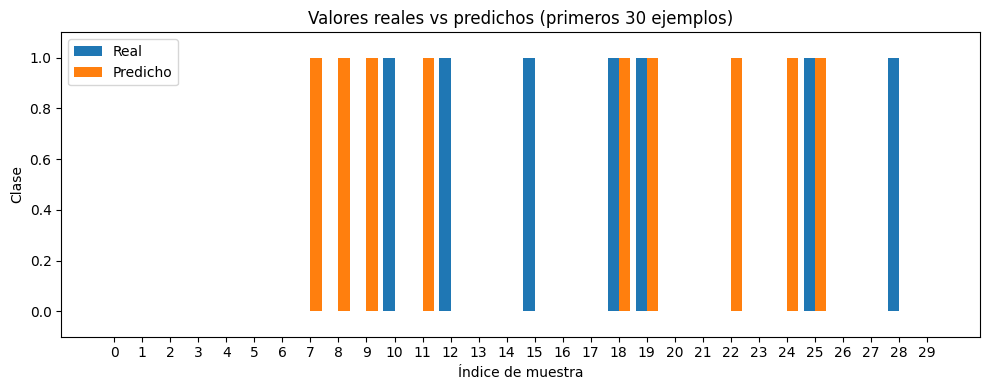

In [ ]:
# Comparar primeros 30 casos
n = 10
indices = np.arange(n)

plt.figure(figsize=(10,4))
plt.bar(indices - 0.2, y_test.values[:n], width=0.4, label="Real")
plt.bar(indices + 0.2, y_pred[:n], width=0.4, label="Predicho")
plt.xticks(indices)
plt.ylim(-0.1, 1.1)
plt.title("Valores reales vs predichos (primeros 30 ejemplos)")
plt.xlabel("Índice de muestra")
plt.ylabel("Clase")
plt.legend()
plt.tight_layout()
plt.show()